In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'students.csv')

In [4]:
df

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,818044,"Her, Joshua",Male,22,181,79.1,Protestant,2.91,6th,Environmental Sciences,Social Sciences,73.0,71.0,0,1,36750.087135
8236,560166,"Reid, Jose",Male,23,178,72.6,Catholic,2.03,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
8237,380174,"Villa, Raechelle",Female,20,169,67.7,Other,3.72,3rd,Environmental Sciences,Economics and Finance,77.0,75.0,1,0,NaN
8238,540967,"Ngo, Preston",Male,23,195,98.6,Other,2.74,4th,Social Sciences,Political Science,50.0,46.0,1,1,40112.041834


In [5]:
import seaborn as sns

In [6]:
len(df[::1000])

9

In [7]:
sample = df.sample(frac=0.2)

In [8]:
sample.corr()

,stud.id,age,height,weight,nc.score,score1,score2,online.tutorial,graduated,salary
stud.id,1.000000,0.028146,-0.029354,-0.034055,0.047729,0.000530,0.019737,0.029206,0.016427,0.046136
age,0.028146,1.000000,0.009144,0.004403,-0.014822,-0.021269,-0.011554,-0.006922,-0.005840,0.055741
height,-0.029354,0.009144,1.000000,0.938158,0.037201,0.163527,0.147933,0.015922,0.093319,0.347815
weight,-0.034055,0.004403,0.938158,1.000000,0.028073,0.154759,0.137665,0.011409,0.098483,0.320805
nc.score,0.047729,-0.014822,0.037201,0.028073,1.000000,-0.051371,-0.044574,0.004704,0.073857,-0.005486
score1,0.000530,-0.021269,0.163527,0.154759,-0.051371,1.000000,0.901895,-0.024613,0.016723,0.441400
score2,0.019737,-0.011554,0.147933,0.137665,-0.044574,0.901895,1.000000,0.050275,0.003679,0.444524
online.tutorial,0.029206,-0.006922,0.015922,0.011409,0.004704,-0.024613,0.050275,1.000000,0.318627,0.002503
graduated,0.016427,-0.005840,0.093319,0.098483,0.073857,0.016723,0.003679,0.318627,1.000000,NaN
salary,0.046136,0.055741,0.347815,0.320805,-0.005486,0.441400,0.444524,0.002503,NaN,1.000000


# a. регрессия для Weight & height

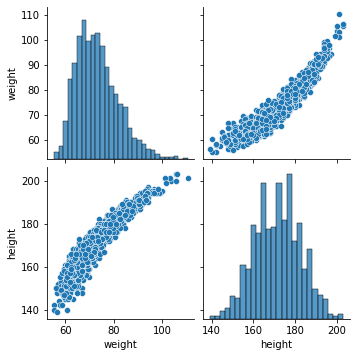

In [9]:
sns.pairplot(data=sample, vars=['weight', 'height'])

In [20]:
data1 = sample[~(sample.weight.isna() | sample.height.isna())]

In [21]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='height'>

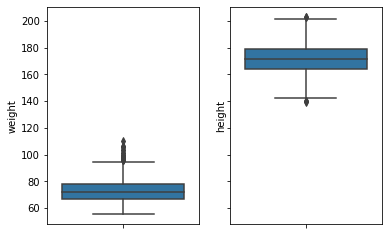

In [22]:
fig, ax = plt.subplots(1,2, sharey=True)
sns.boxplot(data=sample, y='weight', ax=ax[0])
sns.boxplot(data=sample, y='height', ax=ax[1])

In [26]:
x1, y1 = data1.weight, data1.height

In [27]:
x1_mean = x1.sum()/x1.size
x1_mean, x1.mean()

(73.12936893203883, 73.12936893203883)

In [28]:
n1 = x1.size
n1

1648

$s=\sqrt{\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}}$

In [29]:
x1_std = np.sqrt(((x1-x1_mean)**2).sum()/(n1-1))
x1_std, x1.std()

(8.541491238811249, 8.541491238811249)

In [31]:
y1_mean, y1_std = y1.mean(), y1.std()

$\bar{y} = a + b \cdot \bar{x} $

In [33]:
b1 = ((x1-x1_mean)*(y1-y1_mean)).sum()/((x1-x1_mean)**2).sum()
b1

83.71476272482532

In [ ]:
a1 = y1_mean - b1*x1_mean
a1

In [37]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 KB 2.0 MB/s eta 0:00:00


You should consider upgrading via the 'D:\Anna\VE\Scripts\python.exe -m pip install --upgrade pip' command.


In [38]:
import statsmodels.api as sm

In [39]:
xx1 = sm.add_constant(x1)

In [40]:
model = sm.OLS(y1, xx1)

In [41]:
trained_model = model.fit()

In [42]:
trained_model.params, a1, b1

(const     83.714763
 weight     1.199863
 dtype: float64,
 83.71476272482532,
 1.19986251779404)

In [43]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 1.209e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        15:02:36   Log-Likelihood:                -4530.2
No. Observations:                1648   AIC:                             9064.
Df Residuals:                    1646   BIC:                             9075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.7148      0.804    104.182      0.000      82.139      85.291
weight         1.1999      0.011    109.940      0.000       1.178       1.221
==============================================================================
Omnibus:                      106.997   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.201
Skew:                          -0.591   Prob(JB):                     1.61e-30
Kurtosis:                       3.774   Cond. No.                         635.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
xx1

,const,weight
3710,1.0,70.3
8099,1.0,65.3
2510,1.0,64.8
6108,1.0,67.7
5203,1.0,72.8
...,...,...
3245,1.0,69.2
4089,1.0,68.2
5429,1.0,73.3
6738,1.0,83.2


In [45]:
trained_model.predict(xx1)

3710    168.065098
8099    162.065785
2510    161.465854
6108    164.945455
5203    171.064754
           ...    
3245    166.745249
4089    165.545386
5429    171.664685
6738    183.543324
982     168.905001
Length: 1648, dtype: float64

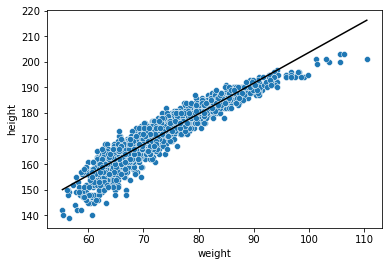

In [46]:
sns.scatterplot(x=x1, y=y1)
xx1 = np.linspace(x1.min(), x1.max(), 10)
yy1 = a1 + b1*xx1
sns.lineplot(x=xx1, y=yy1, color='k');

In [47]:
ssto1 = sum((y1-y1_mean)**2)
ssto1

196549.3567961163

$\hat{y}$ - predicted value at datapoint $x$

In [48]:
y1_hat = a1 + b1*x1

In [49]:
resid1 = y1-y1_hat

<AxesSubplot:xlabel='weight'>

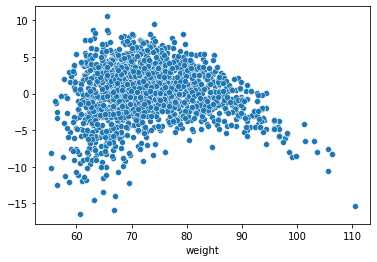

In [50]:
sns.scatterplot(x=x1, y=resid1)

<AxesSubplot:>

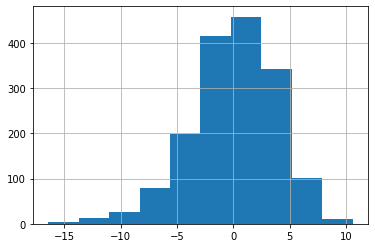

In [51]:
resid1.hist()

Text(0.5, 1.0, 'QQplot')

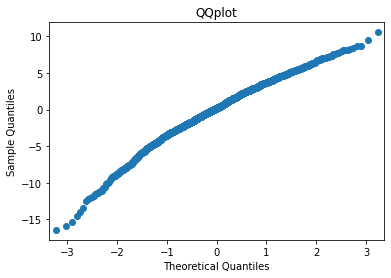

In [52]:
sm.qqplot(resid1)
plt.title('QQplot')

In [53]:
ssresid1 = ((y1-y1_hat)**2).sum()
ssresid1

23558.17238900148

In [54]:
s_e1 = ((resid1**2).sum()/(n1-2))**(1/2)
s_e1, (ssresid1/(n1-2))**(1/2)

(3.783170219147995, 3.783170219147995)

In [185]:
s_e1/y1_mean

0.08780925040141357

In [55]:
r2 = 1 - ssresid1/ssto1
r2

0.8801411880811254

In [56]:
r = np.sqrt(r2)
r

0.9381584024465833

In [58]:
sample[['weight', 'height']].corr()

,weight,height
weight,1.000000,0.938158
height,0.938158,1.000000


In [ ]:
# есть сильная положительная связь между весом и ростом

# b. регрессия для b.	Stud.id & salary

In [60]:
sample.rename(columns = {'stud.id' : 'stud_id'}, inplace = True) 
sample

,stud_id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
3710,510112,"Anderson, Emily",Female,20,174,70.3,Other,3.25,5th,Social Sciences,Political Science,37.0,52.0,1,1,30902.892823
8099,483241,"Valdez, Shirly",Female,22,165,65.3,Other,1.45,3rd,Biology,Social Sciences,71.0,70.0,0,0,NaN
2510,567209,"Dimas-Williams, Ashley",Female,21,164,64.8,Catholic,3.90,1st,Political Science,Environmental Sciences,NaN,NaN,0,0,NaN
6108,675251,"Talley, Jalen",Male,20,165,67.7,Catholic,2.17,3rd,Political Science,Social Sciences,45.0,55.0,1,0,NaN
5203,890171,"Pena Vazquez, Alexus",Female,21,169,72.8,Orthodox,1.09,1st,Political Science,Biology,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,705897,"Aguirre, Jahmila",Female,19,168,69.2,Other,1.17,1st,Biology,Environmental Sciences,NaN,NaN,0,0,NaN
4089,269649,"Sheikh, Andrea",Female,22,166,68.2,Catholic,3.57,2nd,Social Sciences,Environmental Sciences,NaN,NaN,0,0,NaN
5429,738110,"Stone, Julia",Female,21,172,73.3,Protestant,2.48,3rd,Economics and Finance,Biology,63.0,72.0,1,0,NaN
6738,743110,"Garcia, Thomas",Male,20,189,83.2,Catholic,3.29,>6th,Economics and Finance,Environmental Sciences,69.0,63.0,1,0,NaN


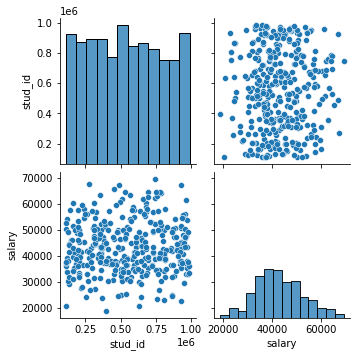

In [61]:
sns.pairplot(data=sample, vars=['stud_id', 'salary'])

In [62]:
data2 = sample[~(sample.stud_id.isna() | sample.salary.isna())]

<AxesSubplot:ylabel='salary'>

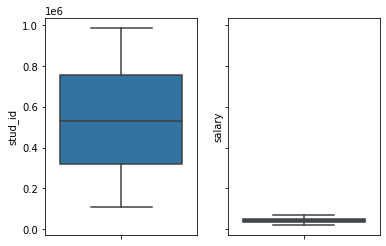

In [63]:
fig, ax = plt.subplots(1,2, sharey=True)
sns.boxplot(data=sample, y='stud_id', ax=ax[0])
sns.boxplot(data=sample, y='salary', ax=ax[1])

In [64]:
x2, y2 = data2.stud_id, data2.salary
x2_mean = x2.sum()/x2.size
x2_mean, x2.mean()

(548634.5151515151, 548634.5151515151)

In [65]:
n2 = x1.size
n2

1648

In [66]:
x2_std = np.sqrt(((x2-x2_mean)**2).sum()/(n2-1))
x2_std, x2.std()

(120403.98447452742, 256822.6798644734)

In [67]:
y2_mean, y2_std = y2.mean(), y2.std()

In [68]:
b2 = ((x2-x2_mean)*(y2-y2_mean)).sum()/((x2-x2_mean)**2).sum()
b2

0.0017659488005685223

In [71]:
a2 = y2_mean - b2*x2_mean
a2

42067.39451241264

In [72]:
xx2 = sm.add_constant(x2)
model = sm.OLS(y2, xx2)
trained_model = model.fit()
trained_model.params, a2, b2

(const      42067.394512
 stud_id        0.001766
 dtype: float64,
 42067.39451241264,
 0.0017659488005685223)

In [73]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7700
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.381
Time:                        15:31:15   Log-Likelihood:                -3851.3
No. Observations:                 363   AIC:                             7707.
Df Residuals:                     361   BIC:                             7714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.207e+04   1218.781     34.516      0.000    3.97e+04    4.45e+04
stud_id        0.0018      0.002      0.878      0.381      -0.002       0.006
==============================================================================
Omnibus:                        5.285   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.221
Skew:                           0.259   Prob(JB):                       0.0735
Kurtosis:                       2.723   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

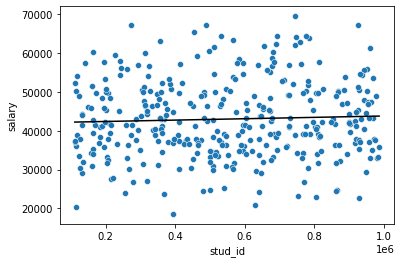

In [74]:
sns.scatterplot(x=x2, y=y2)
xx2 = np.linspace(x2.min(), x2.max(), 10)
yy2 = a2 + b2*xx2
sns.lineplot(x=xx2, y=yy2, color='k');

In [75]:
ssto2 = sum((y2-y2_mean)**2)
ssto2

34983076429.394104

<AxesSubplot:xlabel='stud_id'>

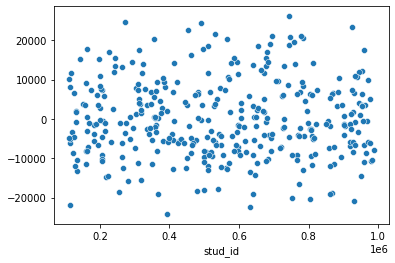

In [76]:
y2_hat = a2 + b2*x2
resid2 = y2-y2_hat
sns.scatterplot(x=x2, y=resid2)

Text(0.5, 1.0, 'QQplot')

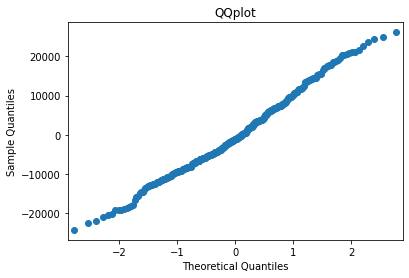

In [77]:
sm.qqplot(resid2)
plt.title('QQplot')

In [78]:
ssresid2 = ((y2-y2_hat)**2).sum()
ssresid2

34908614971.77103

In [79]:
s_e2 = ((resid2**2).sum()/(n2-2))**(1/2)
s_e2, (ssresid2/(n2-2))**(1/2)

(4605.230726424388, 4605.230726424388)

In [80]:
s_e2/y2_mean

0.10700816622985251

In [81]:
r2 = 1 - ssresid2/ssto2
r2

0.00212849941237625

In [82]:
r = np.sqrt(r2)
r

0.046135663129256634

In [83]:
sample[['stud_id', 'salary']].corr()

,stud_id,salary
stud_id,1.000000,0.046136
salary,0.046136,1.000000


In [ ]:
# зависимость отсутствует

# с. регрессия для 	Weight & log(height)

In [88]:
sample['log_height'] = np.log2(sample['height'])
sample

,stud_id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary,log_height
3710,510112,"Anderson, Emily",Female,20,174,70.3,Other,3.25,5th,Social Sciences,Political Science,37.0,52.0,1,1,30902.892823,7.442943
8099,483241,"Valdez, Shirly",Female,22,165,65.3,Other,1.45,3rd,Biology,Social Sciences,71.0,70.0,0,0,NaN,7.366322
2510,567209,"Dimas-Williams, Ashley",Female,21,164,64.8,Catholic,3.90,1st,Political Science,Environmental Sciences,NaN,NaN,0,0,NaN,7.357552
6108,675251,"Talley, Jalen",Male,20,165,67.7,Catholic,2.17,3rd,Political Science,Social Sciences,45.0,55.0,1,0,NaN,7.366322
5203,890171,"Pena Vazquez, Alexus",Female,21,169,72.8,Orthodox,1.09,1st,Political Science,Biology,NaN,NaN,0,0,NaN,7.400879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,705897,"Aguirre, Jahmila",Female,19,168,69.2,Other,1.17,1st,Biology,Environmental Sciences,NaN,NaN,0,0,NaN,7.392317
4089,269649,"Sheikh, Andrea",Female,22,166,68.2,Catholic,3.57,2nd,Social Sciences,Environmental Sciences,NaN,NaN,0,0,NaN,7.375039
5429,738110,"Stone, Julia",Female,21,172,73.3,Protestant,2.48,3rd,Economics and Finance,Biology,63.0,72.0,1,0,NaN,7.426265
6738,743110,"Garcia, Thomas",Male,20,189,83.2,Catholic,3.29,>6th,Economics and Finance,Environmental Sciences,69.0,63.0,1,0,NaN,7.562242


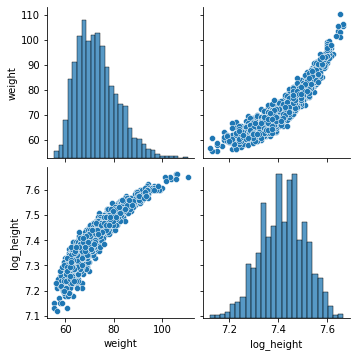

In [89]:
sns.pairplot(data=sample, vars=['weight', 'log_height'])

In [90]:
data3 = sample[~(sample.weight.isna() | sample.log_height.isna())]

<AxesSubplot:ylabel='log_height'>

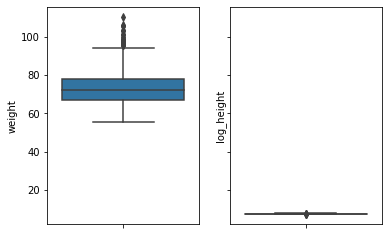

In [91]:
fig, ax = plt.subplots(1,2, sharey=True)
sns.boxplot(data=sample, y='weight', ax=ax[0])
sns.boxplot(data=sample, y='log_height', ax=ax[1])

In [92]:
x3, y3 = data3.weight, data3.log_height
x3_mean = x3.sum()/x3.size
n3 = x1.size
x3_std = np.sqrt(((x3-x3_mean)**2).sum()/(n3-1))
y3_mean, y3_std = y3.mean(), y3.std()

In [93]:
b3 = ((x3-x3_mean)*(y3-y3_mean)).sum()/((x3-x3_mean)**2).sum()
b3

0.010042375355906128

In [94]:
a3 = y3_mean - b3*x3_mean
a3

6.684393609551197

In [95]:
xx3 = sm.add_constant(x3)
model = sm.OLS(y3, xx3)
trained_model = model.fit()
trained_model.params, a3, b3

(const     6.684394
 weight    0.010042
 dtype: float64,
 6.684393609551197,
 0.010042375355906128)

In [96]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_height   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.040e+04
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        15:50:58   Log-Likelihood:                 3228.7
No. Observations:                1648   AIC:                            -6453.
Df Residuals:                    1646   BIC:                            -6443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6844      0.007    922.002      0.000       6.670       6.699
weight         0.0100   9.85e-05    101.986      0.000       0.010       0.010
==============================================================================
Omnibus:                      187.092   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.603
Skew:                          -0.796   Prob(JB):                     6.46e-65
Kurtosis:                       4.331   Cond. No.                         635.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

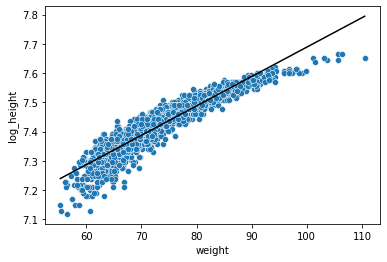

In [97]:
sns.scatterplot(x=x3, y=y3)
xx3 = np.linspace(x3.min(), x3.max(), 10)
yy3 = a3 + b3*xx3
sns.lineplot(x=xx3, y=yy3, color='k');

<AxesSubplot:xlabel='weight'>

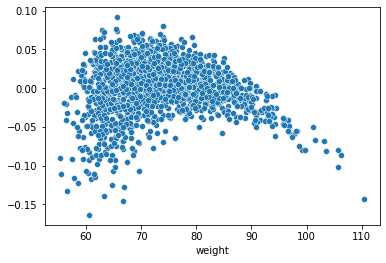

In [99]:
y3_hat = a3 + b3*x3
resid3 = y3-y3_hat
sns.scatterplot(x=x3, y=resid3)

Text(0.5, 1.0, 'QQplot')

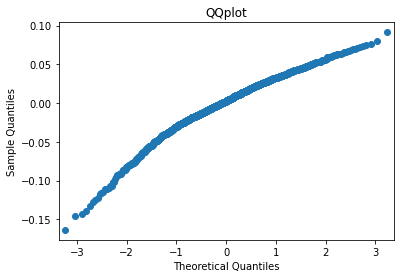

In [100]:
sm.qqplot(resid3)
plt.title('QQplot')

In [101]:
ssresid3 = ((y3-y3_hat)**2).sum()
s_e3 = ((resid3**2).sum()/(n3-2))**(1/2)

In [102]:
s_e3/y2_mean

7.931290840283125e-07

In [104]:
ssto3 = sum((y3-y3_mean)**2)
ssto3

14.035808197862016

In [105]:
r2 = 1 - ssresid3/ssto3
r2

0.8633690458155656

In [106]:
r = np.sqrt(r2)
r

0.9291765417914755

In [107]:
sample[['weight', 'log_height']].corr()

,weight,log_height
weight,1.000000,0.929177
log_height,0.929177,1.000000


In [ ]:
# есть сильная положительная связь между весом и логарифмом ростом, но чуть меньше, чем просто с ростом (там r2 = 0.93)

# регрессия "красное вино"

In [121]:
df2 = pd.read_csv(r'winequality-red.csv')
df2.rename(columns = {'fixed acidity' : 'acidity'}, inplace = True) 
df2

,acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [122]:
df2.corr()

,acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


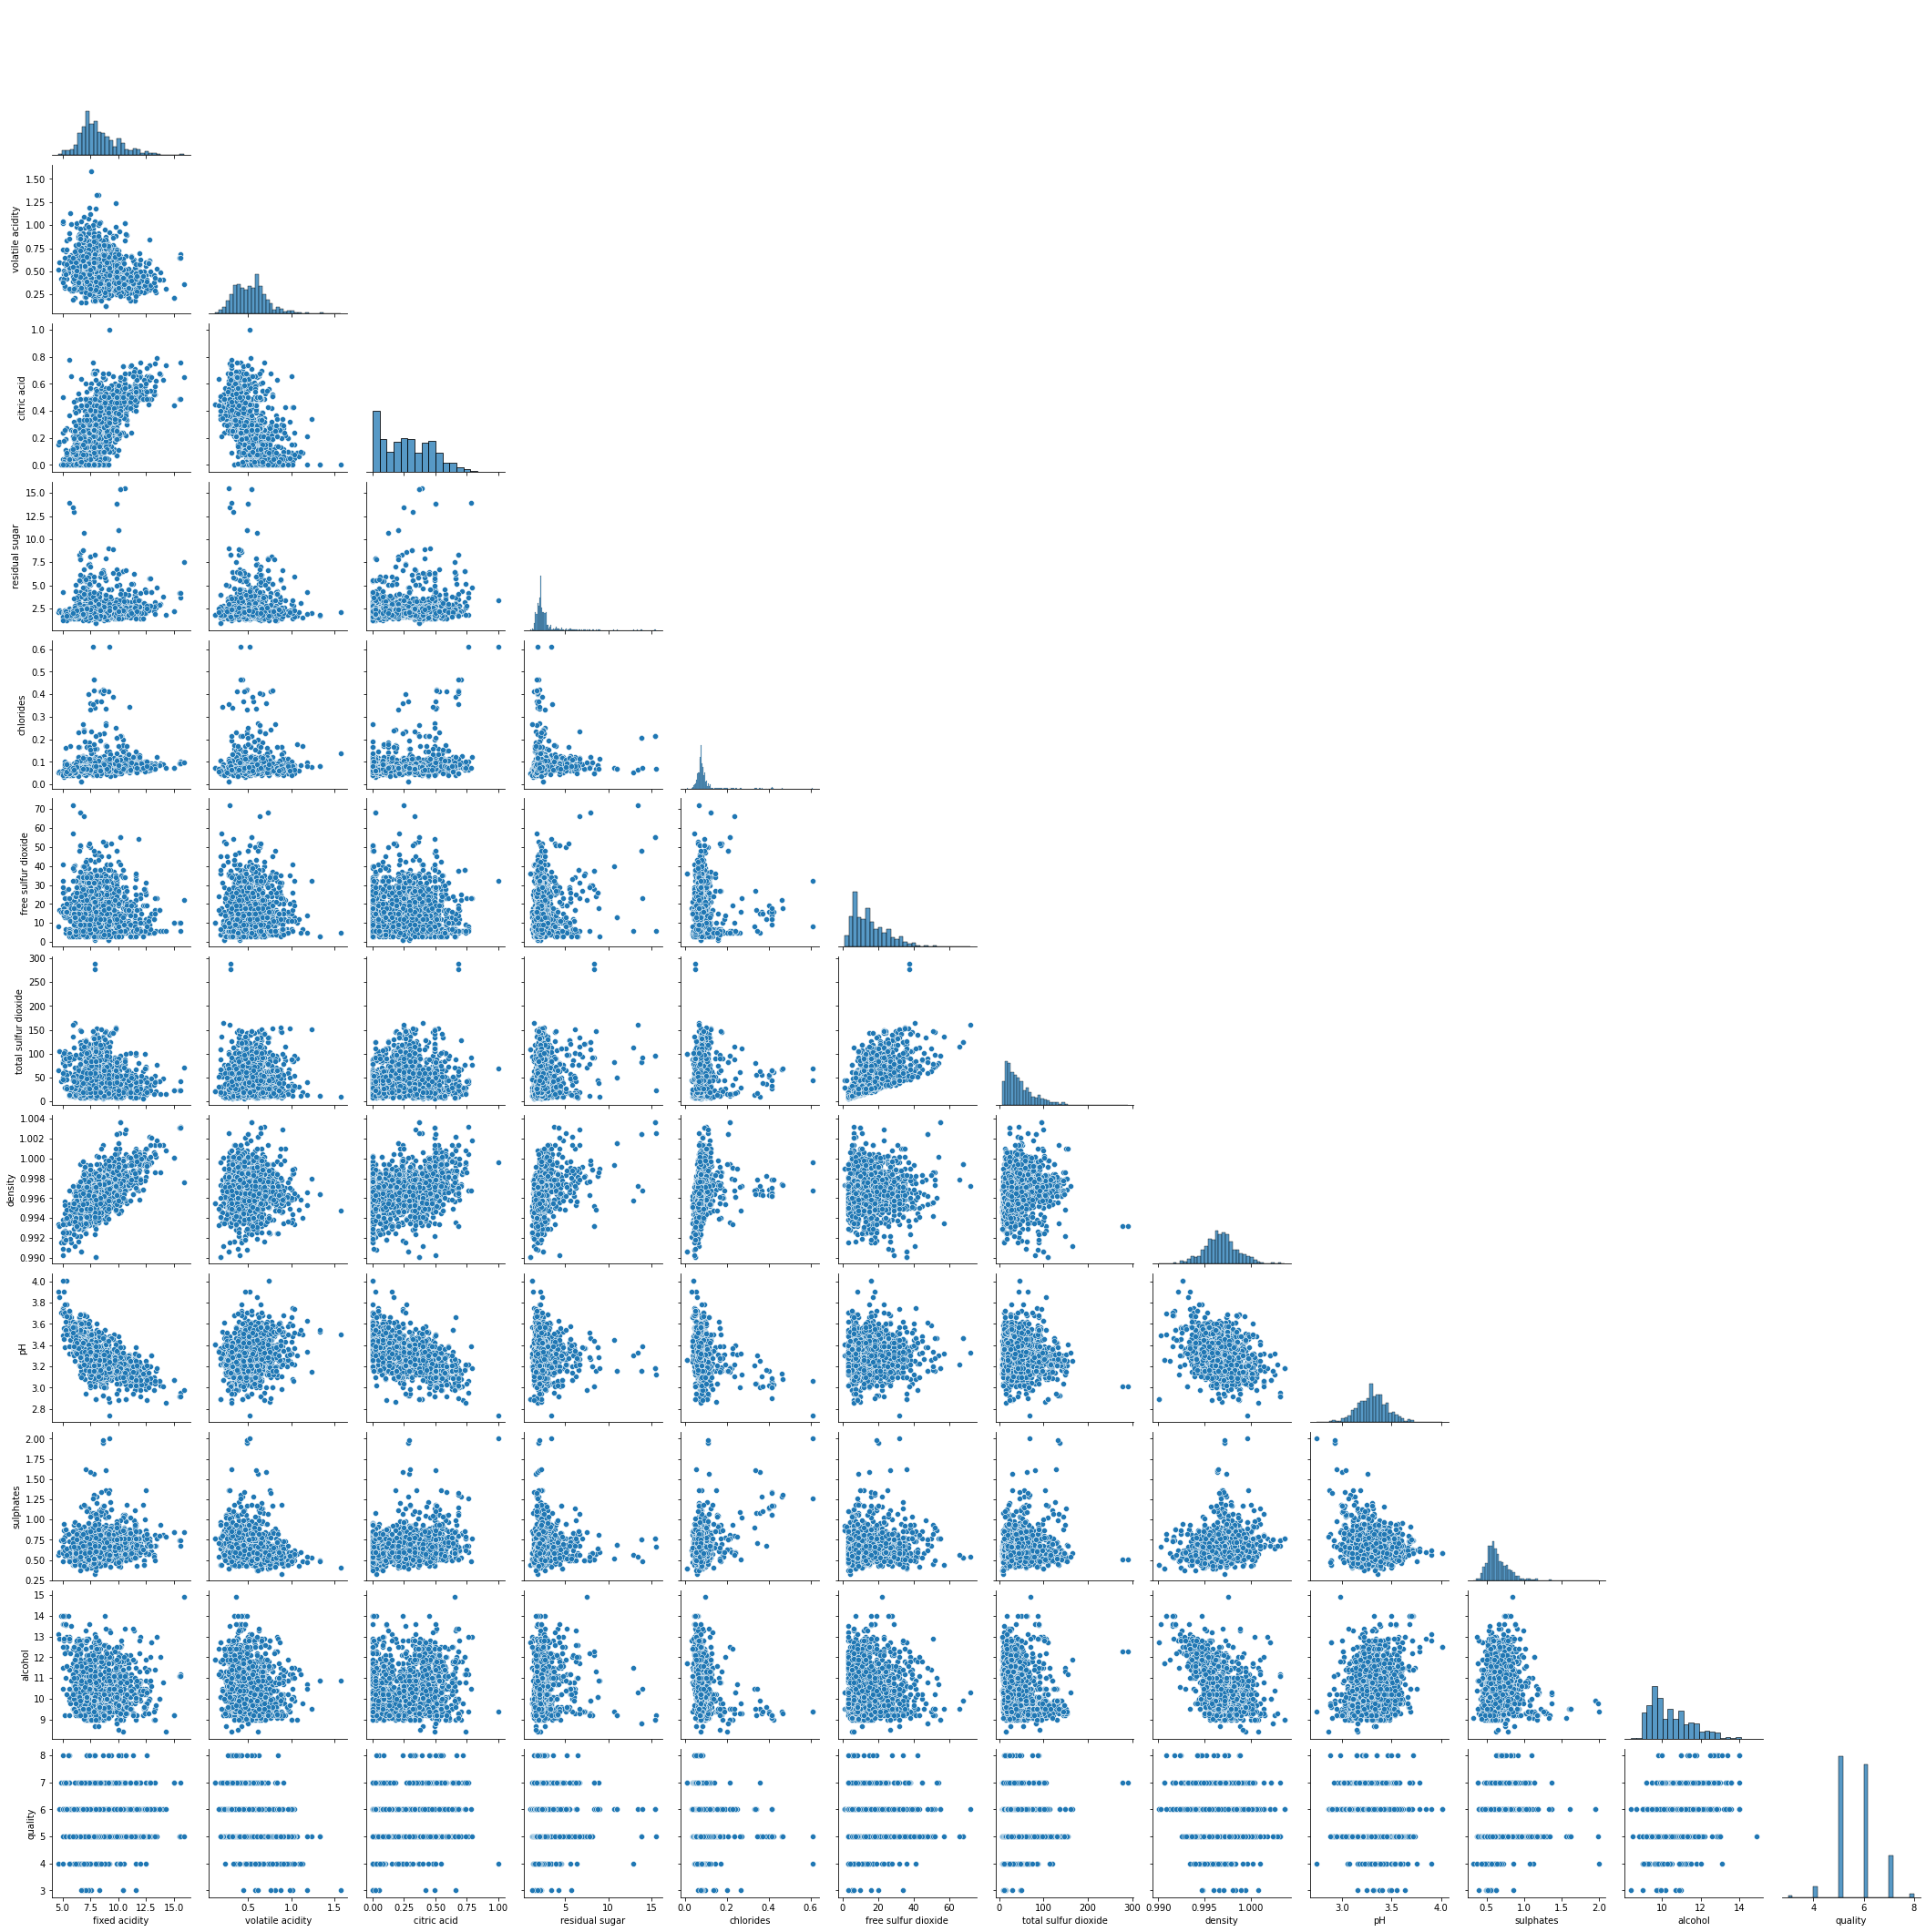

In [120]:
sns.pairplot(data=df2, corner=True)

In [123]:
x4, y4 = df2.acidity, df2.pH
x4_mean = x4.sum()/x4.size
n4 = x4.size
x4_std = np.sqrt(((x4-x4_mean)**2).sum()/(n4-1))
y4_mean, y4_std = y4.mean(), y4.std()

In [124]:
b4 = ((x4-x4_mean)*(y4-y4_mean)).sum()/((x4-x4_mean)**2).sum()
a4 = y4_mean - b4*x4_mean

In [125]:
xx4 = sm.add_constant(x4)
model = sm.OLS(y4, xx4)
trained_model = model.fit()
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1396.
Date:                Mon, 23 May 2022   Prob (F-statistic):          4.06e-220
Time:                        16:28:04   Log-Likelihood:                 1221.3
No. Observations:                1599   AIC:                            -2439.
Df Residuals:                    1597   BIC:                            -2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8150      0.014    276.927      0.000       3.788       3.842
acidity       -0.0606      0.002    -37.366      0.000      -0.064      -0.057
==============================================================================
Omnibus:                       58.659   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.337
Skew:                          -0.155   Prob(JB):                     7.49e-32
Kurtosis:                       4.434   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

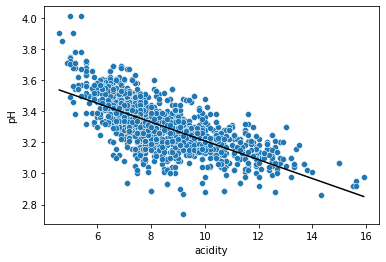

In [126]:
sns.scatterplot(x=x4, y=y4)
xx4 = np.linspace(x4.min(), x4.max(), 10)
yy4 = a4 + b4*xx4
sns.lineplot(x=xx4, y=yy4, color='k');

<AxesSubplot:xlabel='acidity'>

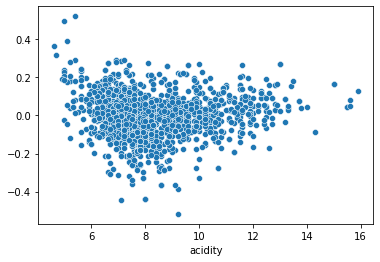

In [127]:
y4_hat = a4 + b4*x4
resid4 = y4-y4_hat
sns.scatterplot(x=x4, y=resid4)

Text(0.5, 1.0, 'QQplot')

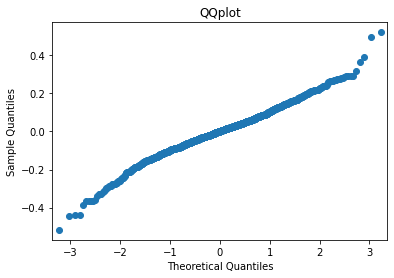

In [128]:
sm.qqplot(resid4)
plt.title('QQplot')

In [129]:
ssresid4 = ((y4-y4_hat)**2).sum()
s_e4 = ((resid4**2).sum()/(n4-2))**(1/2)

In [130]:
s_e4/y4_mean

0.0340686509206162

In [131]:
ssto4 = sum((y4-y4_mean)**2)
ssto4

38.08861851156966

In [132]:
r2 = 1 - ssresid4/ssto4
r2

0.4664592142560895

In [133]:
df2[['acidity', 'pH']].corr()

,acidity,pH
acidity,1.000000,-0.682978
pH,-0.682978,1.000000


In [134]:
# нашла только с такой корреляцией, точность регрессионной модели менее 50%